In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Graphing and Visualizations

In [29]:
data = pd.read_csv("../Data/Intermediate/CDCSTDoverall2000_2020_processed.csv")

In [30]:
data.head()
data.drop(columns=["Unnamed: 0"])

,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,rate_per_100000_primary_and_secondary_syphilis,...,rate_per_100000_male_gonorrhea_multiracial,rate_per_100000_male_gonorrhea_native_hawaiian_other_pacific_islander,rate_per_100000_male_gonorrhea_white,rate_per_100000_male_primary_and_secondary_syphilis_american_indian_alaska_native,rate_per_100000_male_primary_and_secondary_syphilis_asian,rate_per_100000_male_primary_and_secondary_syphilis_black_african_american,rate_per_100000_male_primary_and_secondary_syphilis_hispanic_latino,rate_per_100000_male_primary_and_secondary_syphilis_multiracial,rate_per_100000_male_primary_and_secondary_syphilis_native_hawaiian_other_pacific_islander,rate_per_100000_male_primary_and_secondary_syphilis_white
0,2000,1001,139.0,0.0,107.0,0.0,316.3,0.0,243.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1003,221.0,0.0,139.0,1.0,156.3,0.0,98.3,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1005,152.0,2.0,79.0,1.0,523.4,6.9,272.0,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,1007,53.0,0.0,29.0,0.0,266.6,0.0,145.9,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1009,31.0,0.0,2.0,0.0,60.6,0.0,3.9,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67531,2020,72145,36.0,1.0,4.0,3.0,72.0,2.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67532,2020,72147,2.0,0.0,0.0,0.0,23.8,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67533,2020,72149,21.0,6.0,5.0,0.0,98.3,28.1,23.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67534,2020,72151,29.0,0.0,0.0,1.0,89.8,0.0,0.0,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()

C:\Users\philb\AppData\Local\Temp\ipykernel_22252\3700150800.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()


In [32]:
df_sum.head()
df_sum = df_sum[df_sum.year >= 2002]

C:\Users\philb\AppData\Local\Temp\ipykernel_22252\258922739.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
C:\Users\philb\AppData\Local\Temp\ipykernel_22252\258922739.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


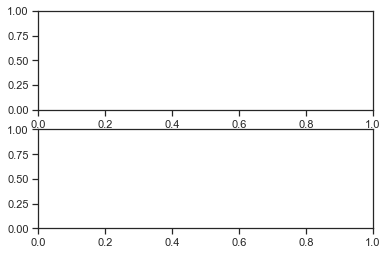

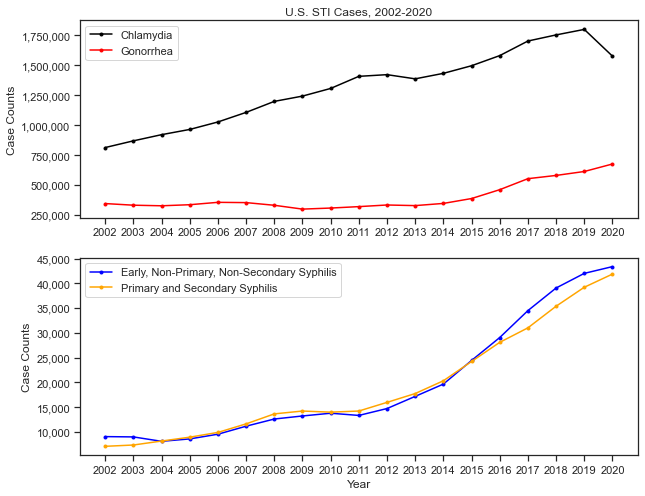

In [33]:
sns.set_theme(style="ticks", palette=None)
fig, ax = plt.subplots(nrows=2,ncols=1)
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(df_sum['cases_chlamydia'], 'k', label='Chlamydia', marker = ".")
plt.plot(df_sum['cases_gonorrhea'], 'r', label='Gonorrhea', marker = ".")
plt.legend()
plt.ylabel('Case Counts')
# plt.xticks(df_sum['year'])
plt.title("U.S. STI Cases, 2002-2020")
plt.xticks(ticks=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], labels=[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.subplot(2,1,2)
plt.plot(df_sum['cases_early_non-primary_non-secondary_syphilis'], 'b', label='Early, Non-Primary, Non-Secondary Syphilis', marker = ".")
plt.plot(df_sum['cases_primary_and_secondary_syphilis'], 'orange', label='Primary and Secondary Syphilis', marker = ".")
plt.legend()
plt.ylabel('Case Counts')
# plt.xticks(df_sum['year'])
plt.xlabel('Year')
plt.xticks(ticks=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], labels=[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('../Output/PosterPresentation/cases_gonorrhea_chlamydia_syphilis',dpi=300)
plt.show()

# Predictions

## National-Level Chlamydia Prediction

In [34]:
data = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv")
data.drop(columns=["Unnamed: 0"])
data.head()

,Unnamed: 0,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,...,pct_ind_transportation_and_warehousing_and_utilities,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate
0,0,2002,1001,72.0,4.0,54.0,3.0,159.3,8.8,119.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2002,1003,244.0,0.0,120.0,0.0,164.7,0.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2002,1005,114.0,0.0,90.0,0.0,389.3,0.0,307.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2002,1007,61.0,0.0,30.0,0.0,291.8,0.0,143.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2002,1009,38.0,1.0,7.0,0.0,72.0,1.9,13.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()
df_sum.head()

C:\Users\philb\AppData\Local\Temp\ipykernel_22252\1022705614.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()


,year,cases_gonorrhea,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_primary_and_secondary_syphilis,total_pop
0,2002,345540.5,812976.0,8411.0,6862.0,287400441
1,2003,331908.5,868886.5,8355.0,7174.0,289880179
2,2004,326941.5,920512.5,7763.0,7976.5,292574453
3,2005,335884.0,964093.0,8169.5,8718.0,295281699
4,2006,355482.5,1021538.5,9177.5,9748.5,298140261


In [36]:
df_model = df_sum[["year", "cases_chlamydia"]]
df_model["year"] = df_model["year"].astype(int)
actual_value = df_model.at[18, "cases_chlamydia"]
df_plot = df_model
df_model = df_model[df_model["year"] <= 2019]
df_model.head(21)

C:\Users\philb\AppData\Local\Temp\ipykernel_22252\1049560925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["year"] = df_model["year"].astype(int)


,year,cases_chlamydia
0,2002,812976.0
1,2003,868886.5
2,2004,920512.5
3,2005,964093.0
4,2006,1021538.5
5,2007,1098633.5
6,2008,1191425.5
7,2009,1235263.5
8,2010,1306284.0
9,2011,1407376.5


In [37]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_model["cases_chlamydia"], order=(2,2,0))
model_fit = model.fit()

In [38]:
 # summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        cases_chlamydia   No. Observations:                   18
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -193.238
Date:                Tue, 26 Jul 2022   AIC                            392.477
Time:                        15:04:37   BIC                            394.794
Sample:                             0   HQIC                           392.595
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0153      0.195     -0.078      0.938      -0.398       0.367
ar.L2         -0.0158      0.086     -0.184      0.854      -0.184       0.153
sigma2      1.466e+09   4.59e-11   3.19e+19      0.0

In [39]:
pred = model_fit.predict(18).to_frame()
fitted_value = pred.iloc[0][0]

In [40]:
print("Predicted: " + str(fitted_value) + " Actual: " + str(actual_value))

Predicted: 1846974.0097039852 Actual: 1576534.5


C:\Users\philb\AppData\Local\Temp\ipykernel_22252\1471679177.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


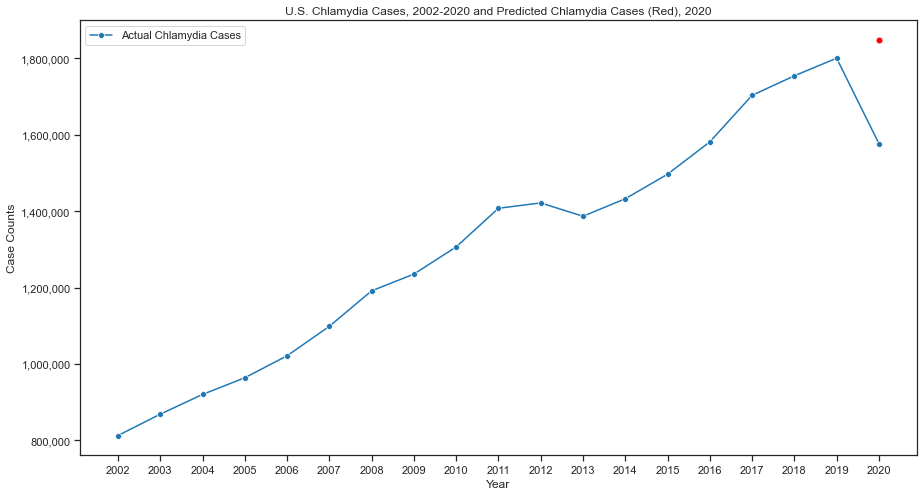

In [41]:
sns.set_theme(style="ticks", palette=None)
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_plot, x = 'year', y = 'cases_chlamydia', marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("U.S. Chlamydia Cases, 2002-2020 and Predicted Chlamydia Cases (Red), 2020")
plt.legend(labels=["Actual Chlamydia Cases"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, fitted_value, marker='o', s=25, c="red")
plt.savefig('../Output/PosterPresentation/ModelOutputs/arima_chlamydia.png',dpi=300)
plt.show()

## National-Level Gonorrhea Prediction

In [42]:
data = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv")
data.drop(columns=["Unnamed: 0"])
data.head()

,Unnamed: 0,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,...,pct_ind_transportation_and_warehousing_and_utilities,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate
0,0,2002,1001,72.0,4.0,54.0,3.0,159.3,8.8,119.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2002,1003,244.0,0.0,120.0,0.0,164.7,0.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2002,1005,114.0,0.0,90.0,0.0,389.3,0.0,307.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2002,1007,61.0,0.0,30.0,0.0,291.8,0.0,143.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2002,1009,38.0,1.0,7.0,0.0,72.0,1.9,13.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()
df_sum.head()

C:\Users\philb\AppData\Local\Temp\ipykernel_22252\1022705614.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()


,year,cases_gonorrhea,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_primary_and_secondary_syphilis,total_pop
0,2002,345540.5,812976.0,8411.0,6862.0,287400441
1,2003,331908.5,868886.5,8355.0,7174.0,289880179
2,2004,326941.5,920512.5,7763.0,7976.5,292574453
3,2005,335884.0,964093.0,8169.5,8718.0,295281699
4,2006,355482.5,1021538.5,9177.5,9748.5,298140261


In [44]:
df_model = df_sum[["year", "cases_gonorrhea"]]
df_model["year"] = df_model["year"].astype(int)
actual_value = df_model.at[18, "cases_gonorrhea"]
df_plot = df_model
df_model = df_model[df_model["year"] <= 2019]
df_model.head(21)

C:\Users\philb\AppData\Local\Temp\ipykernel_22252\4033347500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["year"] = df_model["year"].astype(int)


,year,cases_gonorrhea
0,2002,345540.5
1,2003,331908.5
2,2004,326941.5
3,2005,335884.0
4,2006,355482.5
5,2007,353165.5
6,2008,330930.0
7,2009,298965.5
8,2010,307853.0
9,2011,319792.5


In [45]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_model["cases_gonorrhea"], order=(2,2,0))
model_fit = model.fit()

In [46]:
 # summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        cases_gonorrhea   No. Observations:                   18
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -184.478
Date:                Tue, 26 Jul 2022   AIC                            374.957
Time:                        15:04:40   BIC                            377.274
Sample:                             0   HQIC                           375.075
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0655      0.357     -0.183      0.854      -0.766       0.635
ar.L2         -0.0496      0.252     -0.197      0.844      -0.544       0.445
sigma2      6.357e+08    1.7e-10   3.73e+18      0.0

In [47]:
pred = model_fit.predict(18).to_frame()
fitted_value = pred.iloc[0][0]

In [48]:
print("Predicted: " + str(fitted_value) + " Actual: " + str(actual_value))

Predicted: 649073.109712848 Actual: 675942.5


C:\Users\philb\AppData\Local\Temp\ipykernel_22252\2347992847.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


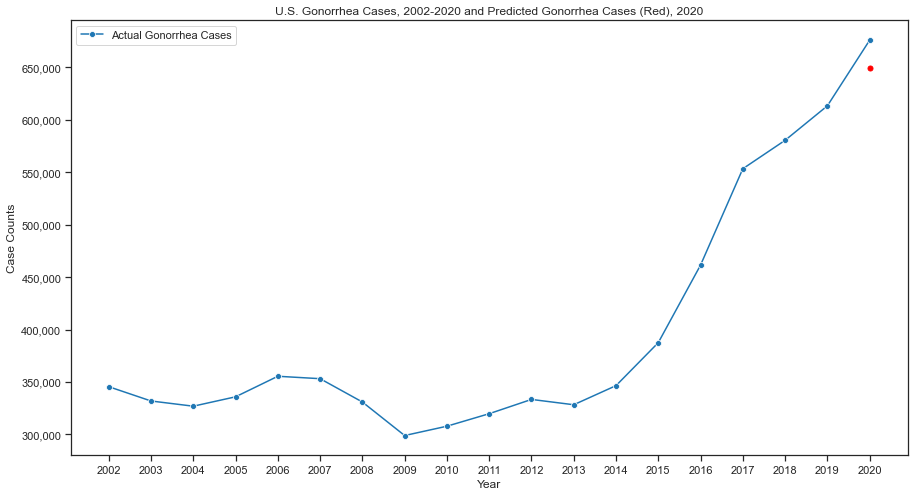

In [49]:
sns.set_theme(style="ticks", palette=None)
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_plot, x = 'year', y = 'cases_gonorrhea', marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("U.S. Gonorrhea Cases, 2002-2020 and Predicted Gonorrhea Cases (Red), 2020")
plt.legend(labels=["Actual Gonorrhea Cases"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, fitted_value, marker='o', s=25, c="red")
plt.savefig('../Output/PosterPresentation/ModelOutputs/arima_gonorrhea.png',dpi=300)
plt.show()

## National-Level Early Syphilis Prediction

In [50]:
data = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv")
data.drop(columns=["Unnamed: 0"])
data.head()

,Unnamed: 0,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,...,pct_ind_transportation_and_warehousing_and_utilities,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate
0,0,2002,1001,72.0,4.0,54.0,3.0,159.3,8.8,119.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2002,1003,244.0,0.0,120.0,0.0,164.7,0.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2002,1005,114.0,0.0,90.0,0.0,389.3,0.0,307.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2002,1007,61.0,0.0,30.0,0.0,291.8,0.0,143.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2002,1009,38.0,1.0,7.0,0.0,72.0,1.9,13.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()
df_sum.head()

C:\Users\philb\AppData\Local\Temp\ipykernel_22252\1022705614.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()


,year,cases_gonorrhea,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_primary_and_secondary_syphilis,total_pop
0,2002,345540.5,812976.0,8411.0,6862.0,287400441
1,2003,331908.5,868886.5,8355.0,7174.0,289880179
2,2004,326941.5,920512.5,7763.0,7976.5,292574453
3,2005,335884.0,964093.0,8169.5,8718.0,295281699
4,2006,355482.5,1021538.5,9177.5,9748.5,298140261


In [52]:
df_model = df_sum[["year", "cases_early_non-primary_non-secondary_syphilis"]]
df_model["year"] = df_model["year"].astype(int)
actual_value = df_model.at[18, "cases_early_non-primary_non-secondary_syphilis"]
df_plot = df_model
df_model = df_model[df_model["year"] <= 2019]
df_model.head(21)

C:\Users\philb\AppData\Local\Temp\ipykernel_22252\3162456709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["year"] = df_model["year"].astype(int)


,year,cases_early_non-primary_non-secondary_syphilis
0,2002,8411.0
1,2003,8355.0
2,2004,7763.0
3,2005,8169.5
4,2006,9177.5
5,2007,10748.5
6,2008,12361.5
7,2009,13053.5
8,2010,13771.0
9,2011,13323.5


In [53]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_model["cases_early_non-primary_non-secondary_syphilis"], order=(2,2,0))
model_fit = model.fit()

In [54]:
 # summary of fit model
print(model_fit.summary())

                                             SARIMAX Results                                              
Dep. Variable:     cases_early_non-primary_non-secondary_syphilis   No. Observations:                   18
Model:                                             ARIMA(2, 2, 0)   Log Likelihood                -134.027
Date:                                            Tue, 26 Jul 2022   AIC                            274.053
Time:                                                    15:04:44   BIC                            276.371
Sample:                                                         0   HQIC                           274.172
                                                             - 18                                         
Covariance Type:                                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [55]:
pred = model_fit.predict(18).to_frame()
fitted_value = pred.iloc[0][0]

In [56]:
print("Predicted: " + str(fitted_value) + " Actual: " + str(actual_value))

Predicted: 44884.334199808996 Actual: 43378.5


C:\Users\philb\AppData\Local\Temp\ipykernel_22252\3746032924.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


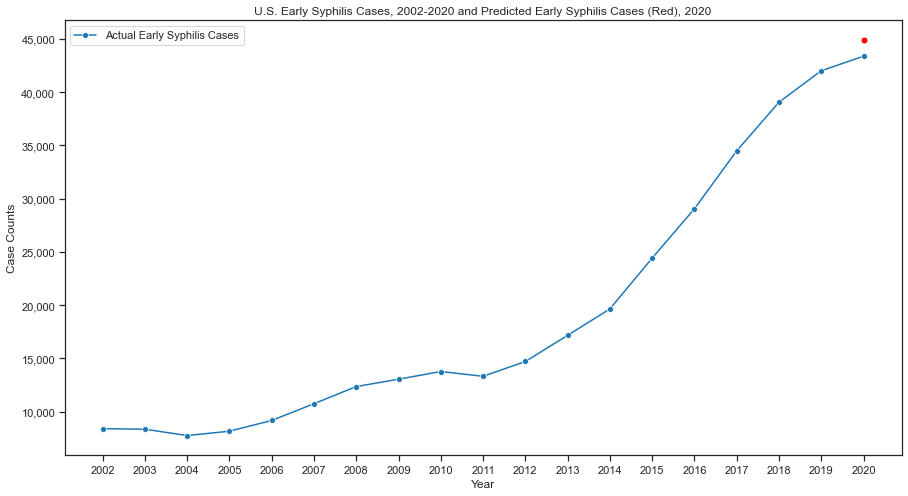

In [57]:
sns.set_theme(style="ticks", palette=None)
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_plot, x = 'year', y = 'cases_early_non-primary_non-secondary_syphilis', marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("U.S. Early Syphilis Cases, 2002-2020 and Predicted Early Syphilis Cases (Red), 2020")
plt.legend(labels=["Actual Early Syphilis Cases"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, fitted_value, marker='o', s=25, c="red")
plt.savefig('../Output/PosterPresentation/ModelOutputs/arima_earlysyphilis.png',dpi=300)
plt.show()

## National-Level Late Syphilis Prediction

In [58]:
data = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv")
data.drop(columns=["Unnamed: 0"])
data.head()

,Unnamed: 0,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,...,pct_ind_transportation_and_warehousing_and_utilities,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate
0,0,2002,1001,72.0,4.0,54.0,3.0,159.3,8.8,119.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2002,1003,244.0,0.0,120.0,0.0,164.7,0.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2002,1005,114.0,0.0,90.0,0.0,389.3,0.0,307.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2002,1007,61.0,0.0,30.0,0.0,291.8,0.0,143.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2002,1009,38.0,1.0,7.0,0.0,72.0,1.9,13.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()
df_sum.head()

C:\Users\philb\AppData\Local\Temp\ipykernel_22252\1022705614.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()


,year,cases_gonorrhea,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_primary_and_secondary_syphilis,total_pop
0,2002,345540.5,812976.0,8411.0,6862.0,287400441
1,2003,331908.5,868886.5,8355.0,7174.0,289880179
2,2004,326941.5,920512.5,7763.0,7976.5,292574453
3,2005,335884.0,964093.0,8169.5,8718.0,295281699
4,2006,355482.5,1021538.5,9177.5,9748.5,298140261


In [60]:
df_model = df_sum[["year", "cases_primary_and_secondary_syphilis"]]
df_model["year"] = df_model["year"].astype(int)
actual_value = df_model.at[18, "cases_primary_and_secondary_syphilis"]
df_plot = df_model
df_model = df_model[df_model["year"] <= 2019]
df_model.head(21)

C:\Users\philb\AppData\Local\Temp\ipykernel_22252\3276084784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["year"] = df_model["year"].astype(int)


,year,cases_primary_and_secondary_syphilis
0,2002,6862.0
1,2003,7174.0
2,2004,7976.5
3,2005,8718.0
4,2006,9748.5
5,2007,11455.0
6,2008,13472.5
7,2009,13991.0
8,2010,13987.0
9,2011,14214.0


In [61]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_model["cases_primary_and_secondary_syphilis"], order=(2,2,0))
model_fit = model.fit()

In [62]:
 # summary of fit model
print(model_fit.summary())

                                        SARIMAX Results                                         
Dep. Variable:     cases_primary_and_secondary_syphilis   No. Observations:                   18
Model:                                   ARIMA(2, 2, 0)   Log Likelihood                -130.409
Date:                                  Tue, 26 Jul 2022   AIC                            266.818
Time:                                          15:04:47   BIC                            269.135
Sample:                                               0   HQIC                           266.936
                                                   - 18                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0870      0.333     -0.261      0.794      -0.740

In [63]:
pred = model_fit.predict(18).to_frame()
fitted_value = pred.iloc[0][0]

In [64]:
print("Predicted: " + str(fitted_value) + " Actual: " + str(actual_value))

Predicted: 42984.88586206164 Actual: 41871.0


C:\Users\philb\AppData\Local\Temp\ipykernel_22252\2379218185.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


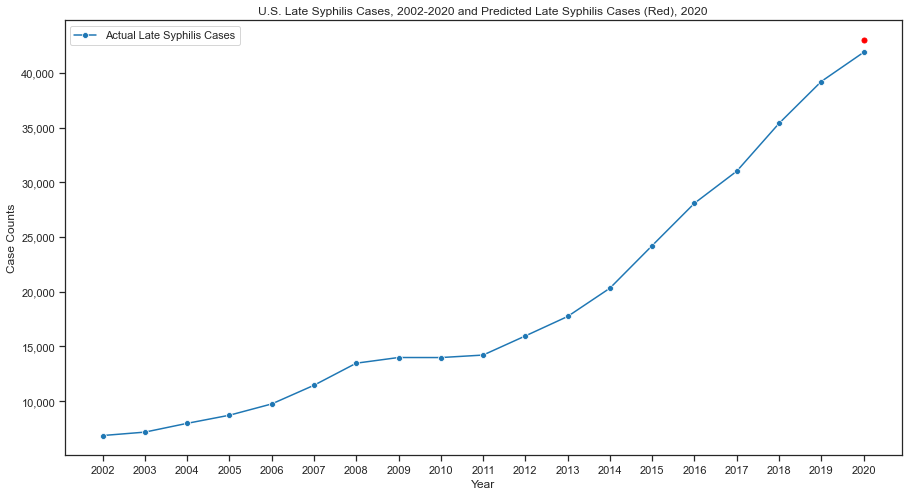

In [65]:
sns.set_theme(style="ticks", palette=None)
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_plot, x = 'year', y = 'cases_primary_and_secondary_syphilis', marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("U.S. Late Syphilis Cases, 2002-2020 and Predicted Late Syphilis Cases (Red), 2020")
plt.legend(labels=["Actual Late Syphilis Cases"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, fitted_value, marker='o', s=25, c="red")
plt.savefig('../Output/PosterPresentation/ModelOutputs/arima_latesyphilis.png',dpi=300)
plt.show()

# Counterfactual Visualization

In [66]:
# data = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv")
# data.drop(columns=["Unnamed: 0"])
# data.head()

In [67]:
# df_sum = data.groupby(['year', "fips"])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()
# df_sum.head()

In [68]:
# df_model = df_sum[["year", "fips", "cases_chlamydia"]]
# df_model["year"] = df_model["year"].astype(int)

# df_model1 = df_model[df_model.fips == 1001]
# df_plot1 = df_model1
# df_model1 = df_model1[df_model1["year"] <= 2019]
# df_model1 = df_model1.reset_index(drop=True)
# df_model1.head(21)

In [69]:
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(df_model1["cases_chlamydia"], order=(2,2,0))
# model_fit = model.fit()

# pred = model_fit.predict(18).to_frame()
# fitted_value1 = pred.iloc[0][0]

In [70]:
# sns.set_theme(style="ticks", palette=None)
# plt.figure(figsize = (15,8))
# g = sns.lineplot(data = df_plot1, x = 'year', y = 'cases_chlamydia', marker = "o")
# g.set_ylabel('Case Counts')
# g.set_xlabel('Year')
# g.set_xticks(df_sum['year'])
# g.set_title("U.S. Chlamydia Cases, 2002-2020 and Predicted Chlamydia Cases (Red), 2020")
# plt.legend(labels=["Actual Gonorrhea Cases"])
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# plt.scatter(2020, fitted_value1, marker='o', s=25, c="red")
# plt.savefig('../Output/PosterPresentation/ModelOutputs/CounterfactualVisualization/arima_chlamydia.png',dpi=300)
# plt.show()